```
This software is a part of GPU Ocean.

Copyright (C) 2019  SINTEF Digital

This notebook is a prototype for all required parts of a realistic simulation

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.
```

In [1]:
#Lets have matplotlib "inline"
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

import os
import sys

#Import packages we need
import numpy as np
from netCDF4 import Dataset

#Helpful during development
import importlib
#importlib.reload(module)

import datetime

from IPython.display import display

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation, rc


#Set large figure sizes
#plt.rcParams["animation.html"] = "jshtml" #Javascript 
plt.rcParams["animation.html"] = "html5" #mp4
plt.rcParams["figure.dpi"] = 100.0 #highres movies/plots

plt.rcParams["animation.writer"] = 'ffmpeg' 
plt.rcParams["animation.codec"] = 'h264' 

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = 'serif'

In [2]:
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../../')))

from SWESimulators import CDKLM16, Common, IPythonMagic, NetCDFInitialization
from SWESimulators import GPUDrifterCollection, Observation, ParticleInfo
from SWESimulators import DataAssimilationUtils as dautils

from demos.realisticSimulations import norkyst_plotting


In [3]:
%cuda_context_handler gpu_ctx

# Read observation file and plot some results

In [4]:
from SWESimulators import SimReader
#observation_file = "2019-12-02/lovese/observation_10_05_44.pickle"
truth_reader = SimReader.SimNetCDFReader("2019-12-02/lovese/lovese_original.nc")

#observation_file = "2019-12-03/lovese/opendrift_observations_18_08_56.pickle"
#truth_reader = SimReader.SimNetCDFReader("2019-11-28/lovese/lovese_original.nc")

observation_file = "2019-12-03/lovese/opendrift_observations_15_06_29.pickle"



### Using interpolation factor 7
#result_folder = 'EPS_2019_11_30-19_35_00/' # Example using    default q0: 8e-3
#result_folder = 'EPS_2019_11_30-19_09_17/' # Example using very small q0: 1e-5
#result_folder = 'EPS_2019_11_30-19_38_52/' # Example using      small q0: 1e-4
#result_folder = 'EPS_2019_11_30-19_50_45/' # Example using      large q0: 1e-3
#result_folder = 'EPS_2019_11_30-19_58_41/' # Example using     medium q0: 5e-4
#result_folder = 'EPS_2019_11_30-20_15_17/' # Example using      small q0: 0.7e-4
#result_folder = 'EPS_2019_11_30-20_18_59/' # Example usingquite small q0: 0.5e-4


### Using interpolation factor 9
#result_folder = 'EPS_2019_11_30-20_02_26/' # Example using     medium q0: 5e-4
#result_folder = 'EPS_2019_11_30-20_06_38/' # Example using      small q0: 1e-4

### Using interpolation factor 5
#result_folder = 'EPS_2019_11_30-20_09_39/' # Example using      small q0: 1e-4
#result_folder = 'EPS_2019_11_30-20_12_57/' # Example using      small q0: 0.7e-4

# With random q0 and random cov-radius
#result_folder = 'EPS_2019_11_30-20_22_57/' # Example q0 [0.5e-4 - 7.5e-4]
#result_folder = 'EPS_2019_11_30-20_29_16/' # Example q0 [0.5e-4 - 5e-4]
#result_folder = 'EPS_2019_11_30-20_40_59/' # Example q0 [0.3e-4 - 3e-4]


### With DA
#result_folder = 'EPS_2019_11_30-20_46_41/' # Example q0 [0.5e-4 - 5e-4]
#result_folder = 'EPS_2019_11_30-20_57_37/' # Example q0 [0.5e-4 - 5e-4]

### DGX-2 results
#result_folder = 'EPS_2019_12_03-14_25_42/'
#result_folder = 'EPS_2019_12_03-19_36_33/'

# mpirun -n 16 python3 sequential_importance_resampling.py --per_node_ensemble_size 63 --observation_file 2019-12-03/lovese/opendrift_observations_15_06_29.pickle --observation_variance 10 --resampling_frequency_minutes 30 --data_assimilation_end_hours 48 --forecast_duration_hours 47
#result_folder = 'EPS_2019_12_04-16_44_55/'

# mpirun --mca btl_openib_if_include mlx5_0 --mca btl_openib_warn_no_device_params_found 0 /home/martinls/miniconda3/envs/gpuocean/bin/python3 sequential_importance_resampling.py --per_node_ensemble_size 21 --observation_file 2019-12-03/lovese/opendrift_observations_15_06_29.pickle --observation_variance 10 --resampling_frequency_minutes 5 --data_assimilation_end_hours 48 --forecast_duration_hours 47
#result_folder = 'EPS_30821_2019_12_05-21_42_22/'

#{"git_revision": "ba25c18c78f6543f5de58fc1b925001f360d8b82", "id": "EPS_31153_2019_12_09-18_38_03", "timestamp": "2019_12_09-18_38_03", "num_rank": 48, "local_ensemble_size": 21, "global_ensemble_size": 1008, "observation_variance": 10.0, "dt": 0.0, "per_node_ensemble_size": 21, "no_resampling": false, "observation_file": "2019-12-03/lovese/opendrift_observations_15_06_29.pickle", "log_file": "sequential_importance_resampling.log", "log_level": 20, "resampling_frequency_minutes": 5, "data_assimilation_end_hours": 48, "forecast_duration_hours": 48, "profile": false}
#result_folder = 'ensemble2_48h_experiments/EPS_31153_2019_12_09-18_38_03/'

#{"git_revision": "ba25c18c78f6543f5de58fc1b925001f360d8b82", "id": "EPS_31154_2019_12_09-23_19_08", "timestamp": "2019_12_09-23_19_08", "num_rank": 48, "local_ensemble_size": 21, "global_ensemble_size": 1008, "observation_variance": 10.0, "dt": 0.0, "per_node_ensemble_size": 21, "no_resampling": false, "observation_file": "2019-12-03/lovese/opendrift_observations_15_06_29.pickle", "log_file": "sequential_importance_resampling.log", "log_level": 20, "resampling_frequency_minutes": 30, "data_assimilation_end_hours": 48, "forecast_duration_hours": 48, "profile": false}
#result_folder = 'ensemble2_48h_experiments/EPS_31154_2019_12_09-23_19_08/'

#{"git_revision": "ba25c18c78f6543f5de58fc1b925001f360d8b82", "id": "EPS_31155_2019_12_10-03_56_10", "timestamp": "2019_12_10-03_56_10", "num_rank": 48, "local_ensemble_size": 21, "global_ensemble_size": 1008, "observation_variance": 10.0, "dt": 0.0, "per_node_ensemble_size": 21, "no_resampling": true, "observation_file": "2019-12-03/lovese/opendrift_observations_15_06_29.pickle", "log_file": "sequential_importance_resampling.log", "log_level": 20, "resampling_frequency_minutes": 5, "data_assimilation_end_hours": 48, "forecast_duration_hours": 48, "profile": false}
#result_folder = 'ensemble2_48h_experiments/EPS_31155_2019_12_10-03_56_10/'

# 10k ensemble
#{"git_revision": "ff3af08db5c3044583ffcef22d7b097a9363a6aa", "id": "EPS_31561_2019_12_23-15_25_15", "timestamp": "2019_12_23-15_25_15", "num_rank": 16, "local_ensemble_size": 630, "global_ensemble_size": 10080, "observation_variance": 10.0, "dt": 0.0, "per_node_ensemble_size": 630, "no_resampling": false, "observation_file": "2019-12-03/lovese/opendrift_observations_15_06_29.pickle", "log_file": "sequential_importance_resampling.log", "log_level": 20, "resampling_frequency_minutes": 5, "data_assimilation_end_hours": 48, "forecast_duration_hours": 24, "profile": false}
result_folder = 'ensemble_10k_members_2d_da_1d_fc_5_min/EPS_31561_2019_12_23-15_25_15/'

### Deterministic data
deterministic_filename = os.path.join('deterministic_forecast_2days_2019_12_06-10_09_45', 'trajectory_forecast_48_to_95.pickle')
#deterministic_filename = os.path.join('deterministic_forecast_12hours_2019_12_06-09_59_08', 'trajectory_forecast_12_to_24.pickle')


eta = truth_reader.getLastTimeStep()[0]

obs = Observation.Observation(observation_type=dautils.ObservationType.UnderlyingFlow,
                              domain_size_x=truth_reader.get("nx")*truth_reader.get("dx"), domain_size_y=truth_reader.get("ny")*truth_reader.get("dy"),
                              nx=truth_reader.get("nx"), ny=truth_reader.get("ny"),
                              land_mask=eta.mask)
obs.read_pickle(observation_file)

In [5]:
analyse_particle_infos = False

particle_infos = None
if analyse_particle_infos:
    particle_info_dir = os.path.join(result_folder, "particle_info")
    filenames = os.listdir(particle_info_dir)
    particle_infos = [None] * len(filenames)

    for i in range(len(particle_infos)):
        particle_infos[i] = ParticleInfo.ParticleInfo()
        particle_infos[i].read_pickle(os.path.join(particle_info_dir, filenames[i]))

In [6]:
extra_cell_id = 19


def state_at_recorded_cell(extra_cell_id):

    def get_time_series_for_particle(particle_info, extra_cell_id):

        time  = particle_info.get_sample_times()
        hu = np.empty_like(time)
        hv = np.empty_like(time)

        all_buoy_obs = particle_info.state_df["extra_states"]
        for t in range(len(time)):
            hu[t] = all_buoy_obs[t][extra_cell_id,1]
            hv[t] = all_buoy_obs[t][extra_cell_id,2]

        return time, hu, hv

    #obs_t, obs_hu, obs_hv = get_time_series_for_buoy(obs, buoy_id)

    fig = plt.figure(figsize=(8,4))
    plt.legend()
    plt.title('')

    t, _, _ = get_time_series_for_particle(particle_infos[0], extra_cell_id)
    hu_mean = np.zeros_like(t)
    for particle_info in particle_infos:
        t, hu, _ = get_time_series_for_particle(particle_info, extra_cell_id)
        hu_mean += hu
        plt.plot(t, hu, color='xkcd:light blue grey', alpha=0.6)

    hu_mean = hu_mean/len(particle_infos)
    plt.plot(t, hu_mean, color="red", alpha=0.6)
    #plt.plot(obs_t[:25], obs_hu[:25])
    plt.title("hu")

    fig = plt.figure(figsize=(8,4))
    plt.legend()
    plt.title('')

    hv_mean = np.zeros_like(t)
    for particle_info in particle_infos:
        t, _, hv = get_time_series_for_particle(particle_info, extra_cell_id)
        hv_mean += hv
        plt.plot(t, hv, color='xkcd:light blue grey', alpha=0.6)


    hv_mean = hv_mean/len(particle_infos)
    plt.plot(t, hv_mean, color="red", alpha=0.6)
    #plt.plot(obs_t[:25], obs_hv[:25])
    plt.title("hv")

    #plt.xlim([800, 1000])

    print(t.shape)
    print(type(hu), hu.shape)

if analyse_particle_infos:
    state_at_recorded_cell(extra_cell_id)
else:
    print('We skip this part...')

We skip this part...


# Plot drifter trajectory forecast

In [7]:
drifter_forecast_dir = os.path.join(result_folder, "forecast_observation_files")
filenames = os.listdir(drifter_forecast_dir)

drifter_forecast = [None] * len(filenames)
for i in range(len(drifter_forecast)):
    drifter_forecast[i] = Observation.Observation(domain_size_x=truth_reader.get("nx")*truth_reader.get("dx"), domain_size_y=truth_reader.get("ny")*truth_reader.get("dy"),
                              nx=truth_reader.get("nx"), ny=truth_reader.get("ny"),
                              land_mask=eta.mask)
    drifter_forecast[i].read_pickle(os.path.join(drifter_forecast_dir,filenames[i]))
    
deterministic_drifter_forecast = Observation.Observation(domain_size_x=truth_reader.get("nx")*truth_reader.get("dx"), domain_size_y=truth_reader.get("ny")*truth_reader.get("dy"),
                              nx=truth_reader.get("nx"), ny=truth_reader.get("ny"),
                              land_mask=eta.mask)
deterministic_drifter_forecast.read_pickle(deterministic_filename)

In [38]:
def forecastPlot(ax, true_paths, ensemble_paths, deterministic_paths=None, color_id=0, 
                 forecast_point_size=2, truth_point_size=6, mean_paths=[None]):
    """
    ax: Axis object to draw trajectories in
    true_path: A single list of paths that represents the truth
    ensemble_paths: Multiple lists of paths that represents the forecast
    color_id: integer representing a pre-defined color combination.
    """

    color_combinations = [
        # [true color, forecast color]
        #['xkcd:dark grey blue', 'xkcd:light blue grey', 'xkcd:wine'],
        ['xkcd:scarlet', 'xkcd:light blue grey', 'xkcd:dark grey blue'],
        ['xkcd:viridian', 'xkcd:foam green']
    ]
    
    assert(color_id < len(color_combinations)), 'Invalid color_id'
    
    true_color = color_combinations[color_id][0]
    forecast_color = color_combinations[color_id][1]
    mean_color = color_combinations[color_id][2]

    # Plot forecast paths 
    for paths in ensemble_paths:
        for path in paths:
            #ax.plot(path[:,0], path[:,1], color=forecast_color, alpha=0.1) # 1k members
            ax.plot(path[:,0], path[:,1], color=(0.447,0.576,0.796), alpha=0.01) # 10k members
        
        # Mark end position of forecast
        end_position   = paths[-1][-1,:]
        #circ_end_forecast = matplotlib.patches.Circle((end_position[0], end_position[1]), 
        #                                              forecast_point_size, 
        #                                              fill=False, zorder=10,
        #                                              alpha=0.7) # 1k members
        circ_end_forecast = matplotlib.patches.Circle((end_position[0], end_position[1]), 
                                                      0.002,
                                                      fill=False, zorder=10,
                                                      alpha=0.1) # 10k members
        ax.add_patch(circ_end_forecast)

    
    # Plot true path
    for path in true_paths:
        ax.plot(path[:,0], path[:,1], '-.', color=true_color, zorder=5)
        
    # Plot deterministic path
    if deterministic_paths is not None and deterministic_paths[0].shape[0] > 0:
        for path in deterministic_paths:
            ax.plot(path[:,0], path[:,1], '--', color='g', zorder=7)
    
    # Plot mean path
    if mean_paths[0] is not None:
        for path in mean_paths:
            ax.plot(path[:,0], path[:,1], color=mean_color, zorder=6)
    
    # Mark start and end of true path
    start_pos = true_paths[0][0,:]
    end_pos   = true_paths[-1][-1,:]
    circ_start = matplotlib.patches.Circle((start_pos[0], start_pos[1]), 
                                           truth_point_size,
                                           fill=False, zorder=10)
    ax.add_patch(circ_start)
    #circ_end = matplotlib.patches.Circle((end_pos[0], end_pos[1]), 
    #                                     truth_point_size,
    #                                     fill=False, zorder=10)
    #ax.add_patch(circ_end)
    ax.plot(end_pos[0], end_pos[1], 'x', color='k', zorder=11)
    
    if deterministic_paths is not None and deterministic_paths[0].shape[0] > 0:
        ax.plot(deterministic_paths[-1][-1,0], deterministic_paths[-1][-1,1], 
                   marker='o', markeredgecolor='g', markerfacecolor=None)
    
    # Mark end of mean path
    if mean_paths[0] is not None:
        #xend = matplotlib.patches.Circle((mean_paths[-1][-1,0], mean_paths[-1][-1,1]),
        #                                 truth_point_size,
        #                                 fill=False, zorder=10)
        #ax.add_patch(xend)
        ax.plot(mean_paths[-1][-1,0], mean_paths[-1][-1,1], 
                   marker='o', markeredgecolor='k', markerfacecolor='b')
        
    
        
def createForecastCanvas(observation):
    """
    true_sim_reader: The SimReader object containing nx, ny, etc
    """   
    
    nx = observation.nx
    ny = observation.ny
    
    fig = plt.figure(figsize=(7,7))
    ax = plt.subplot(111)
    
    extent=np.array([0, observation.domain_size_x, 0, observation.domain_size_y])/1000
    ax.imshow(observation.land_mask, origin="lower", 
              extent=extent, cmap='binary')

    return ax


In [39]:
def makeDrifterPlots(drifter_id, start_time_forecast, end_time_forecast, xlim=None, ylim=None):
    drifter_paths = [None]*len(drifter_forecast)
    for i in range(len(drifter_paths)):
        drifter_paths[i] = drifter_forecast[i].get_drifter_path(drifter_id, 
                                                                start_time_forecast, 
                                                                end_time_forecast,
                                                                assume_no_boundary_trouble=True)

    deterministic_drifter_path = deterministic_drifter_forecast.get_drifter_path(drifter_id, start_time_forecast, end_time_forecast)

    truth_paths = obs.get_drifter_path(drifter_id, start_time_forecast, end_time_forecast)

    mean_path = drifter_forecast[0].get_drifter_path(drifter_id,  
                                                     start_time_forecast,
                                                     end_time_forecast,
                                                     keepDomainSize=False)[0]
    
    num_paths_in_mean = 1
    for i in range(1, len(drifter_forecast)):
        if not np.isnan(drifter_paths[i][0]).any():
            mean_path += drifter_paths[i][0]
            num_paths_in_mean += 1

    mean_path /= num_paths_in_mean



    #ax = createForecastCanvas(obs)
    fig, axs = plt.subplots(1, 1, figsize=(7,7))

    print(len(drifter_paths[0]))
    print(drifter_paths[0][0].shape)
    forecastPlot(axs, truth_paths, drifter_paths, deterministic_drifter_path, forecast_point_size=0.002, truth_point_size=0.001, mean_paths=[mean_path])

    # adjust plot for SIR paper
    if ylim is None:
        ylim = plt.ylim()
    if xlim is None:
        xlim = plt.xlim()

    yint = range(int(np.floor(ylim[0])), int(np.ceil(ylim[1])+1))
    plt.yticks(yint)
    xint = range(int(np.floor(xlim[0])), int(np.ceil(xlim[1])+1))
    plt.xticks(xint)

    for tick in axs.xaxis.get_major_ticks():
        tick.label.set_fontsize(14)
        #tick.label.set_rotation('vertical')
        tick.label.set_y(-.02)
    for tick in axs.yaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
        tick.label.set_x(-.02) 

    plt.ylim(ylim)
    plt.xlim(xlim)

    plt.tick_params(direction='in', length=6, width=3)

    filename_fig = os.path.join(result_folder, "drifter_" + str(drifter_id) + "_fc_" + str(int(start_time_forecast/3600)) + "_to_" + str(int(end_time_forecast/3600)) + "_" + str(int(plt.rcParams["figure.dpi"])) + "_dpi")

    fig.savefig(filename_fig + ".png", bbox_inches='tight')
    #plt.axis('equal')
    plt.gca().set_aspect('equal', adjustable='box')
    fig.savefig(filename_fig + "_equal.png", bbox_inches='tight')

1
(288, 2)
1
(288, 2)
1
(288, 2)
1
(288, 2)


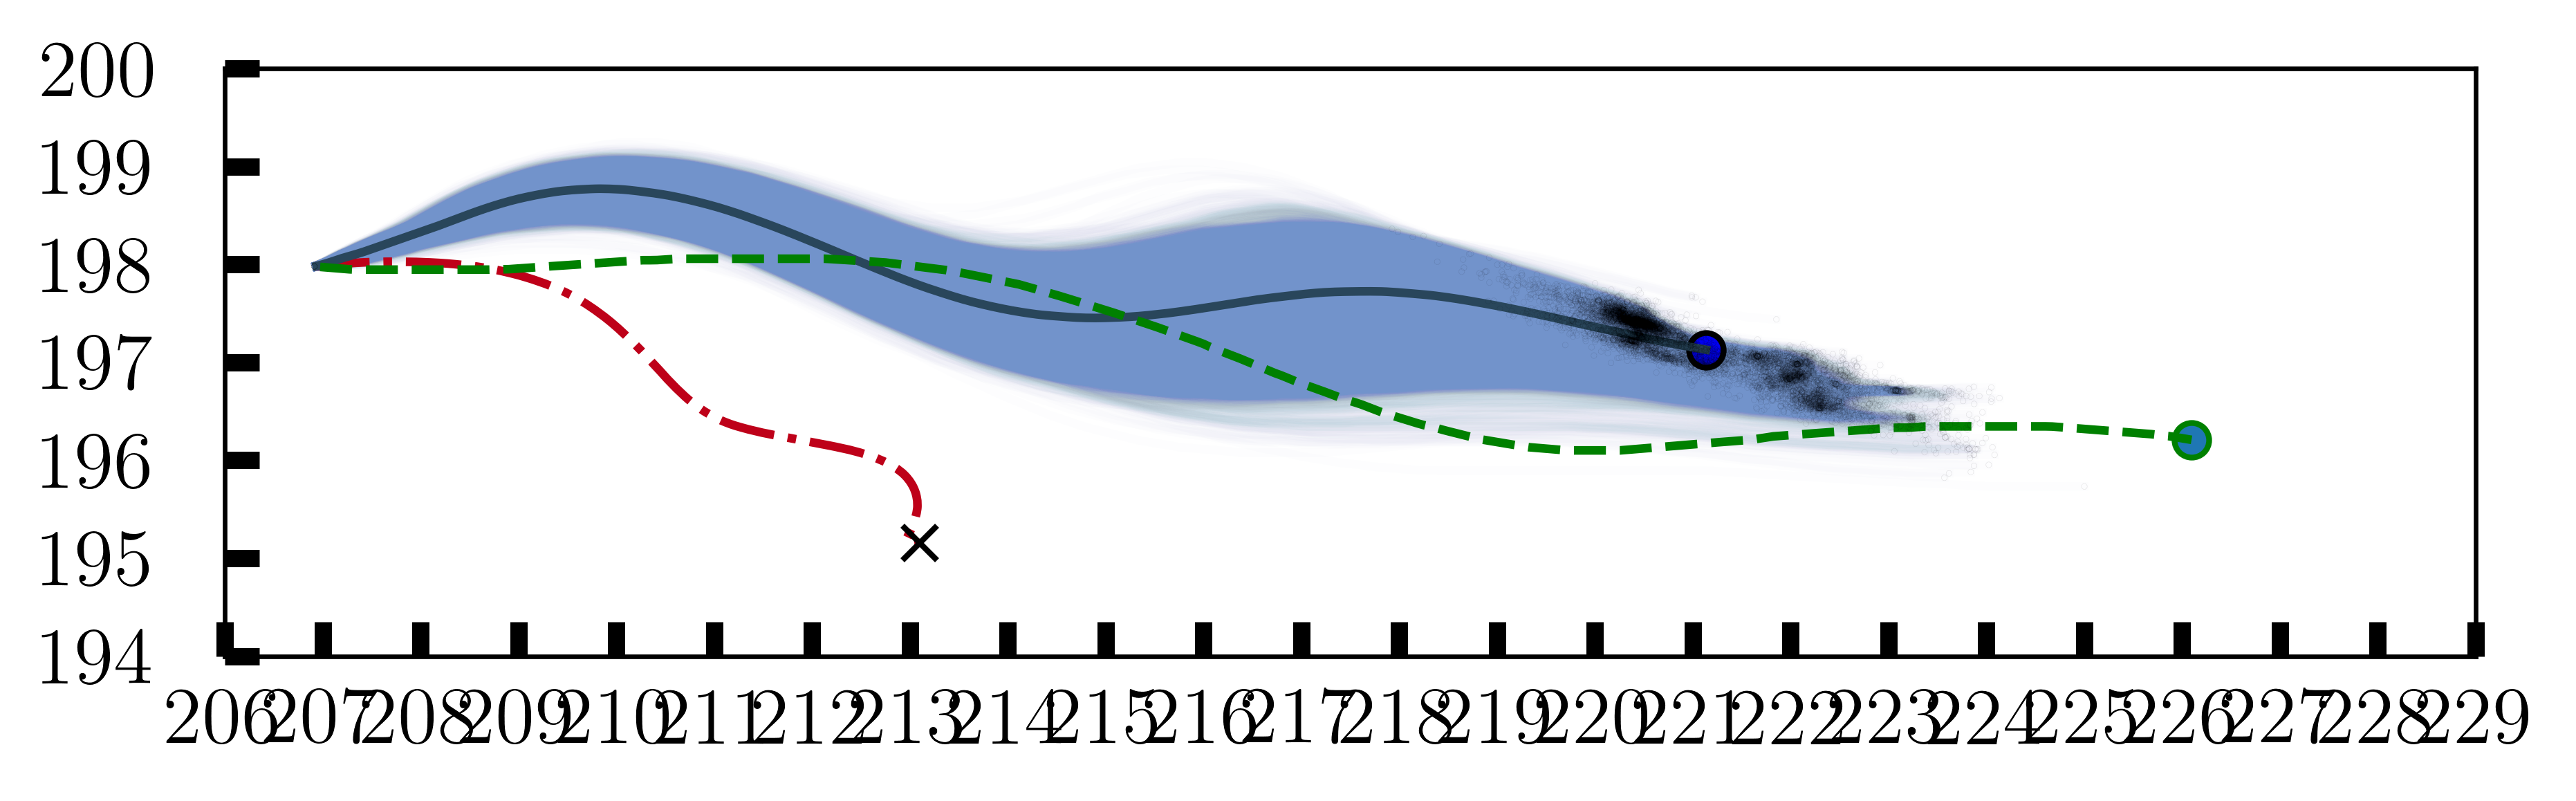

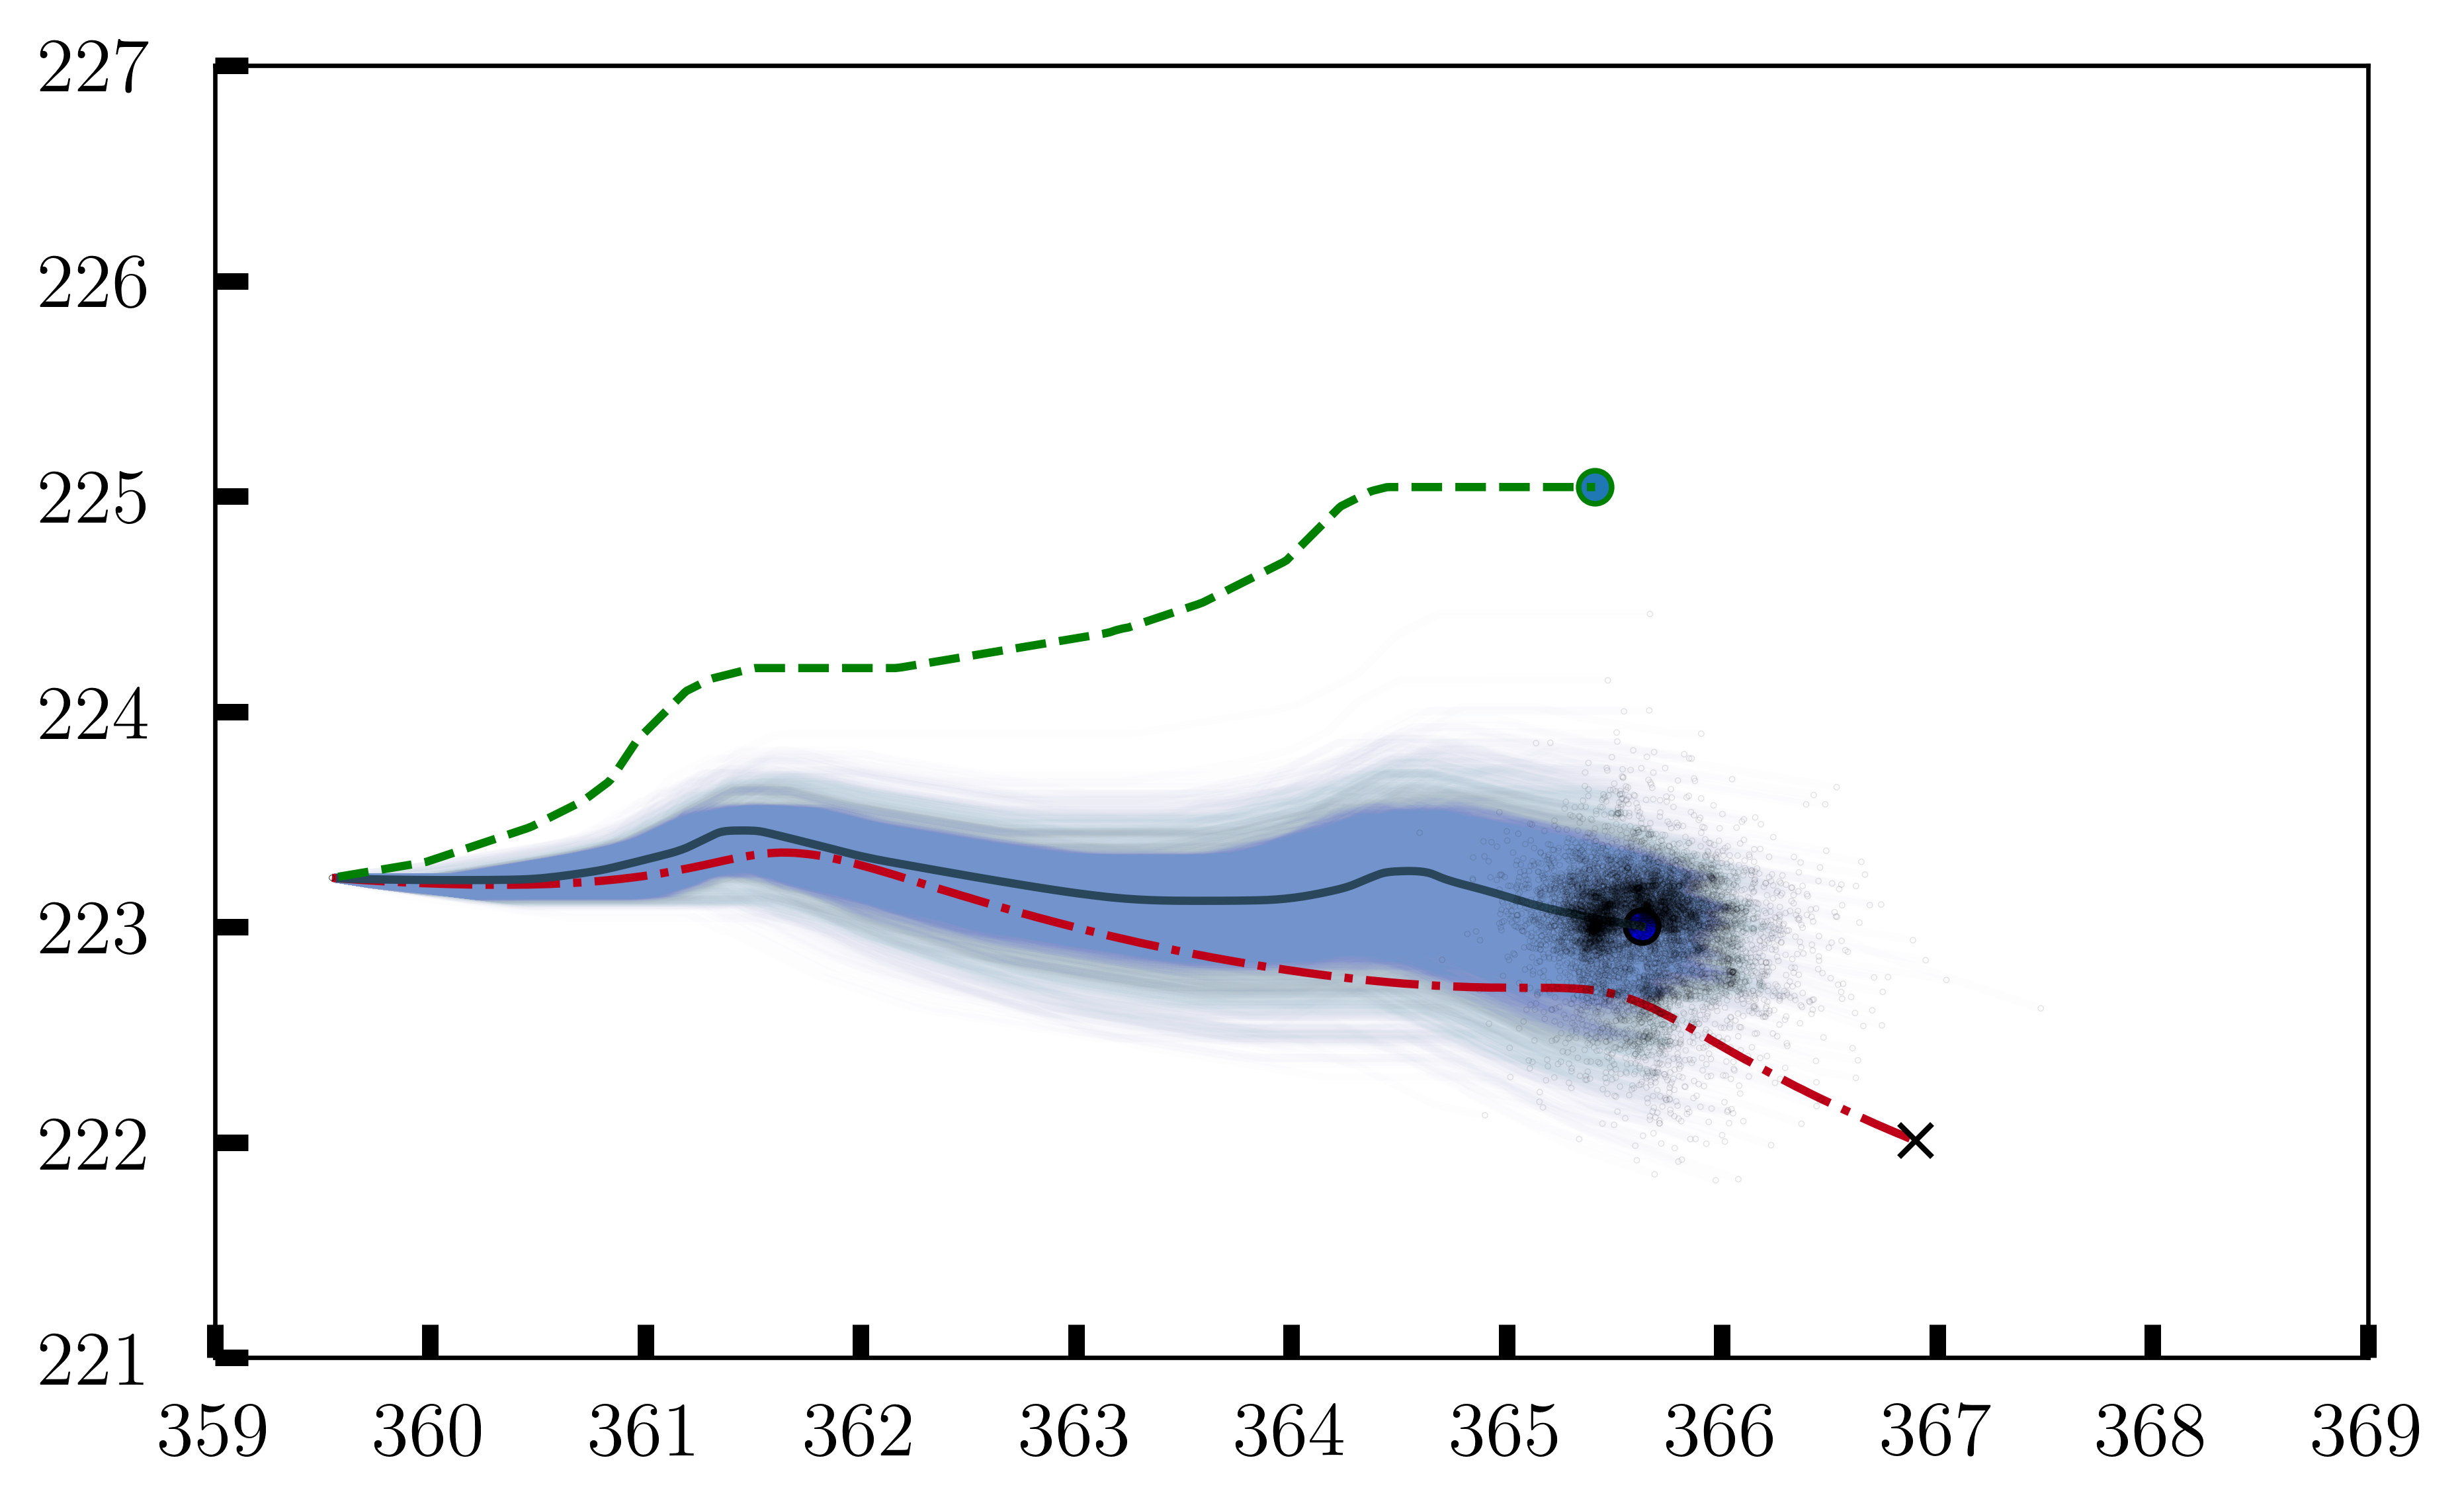

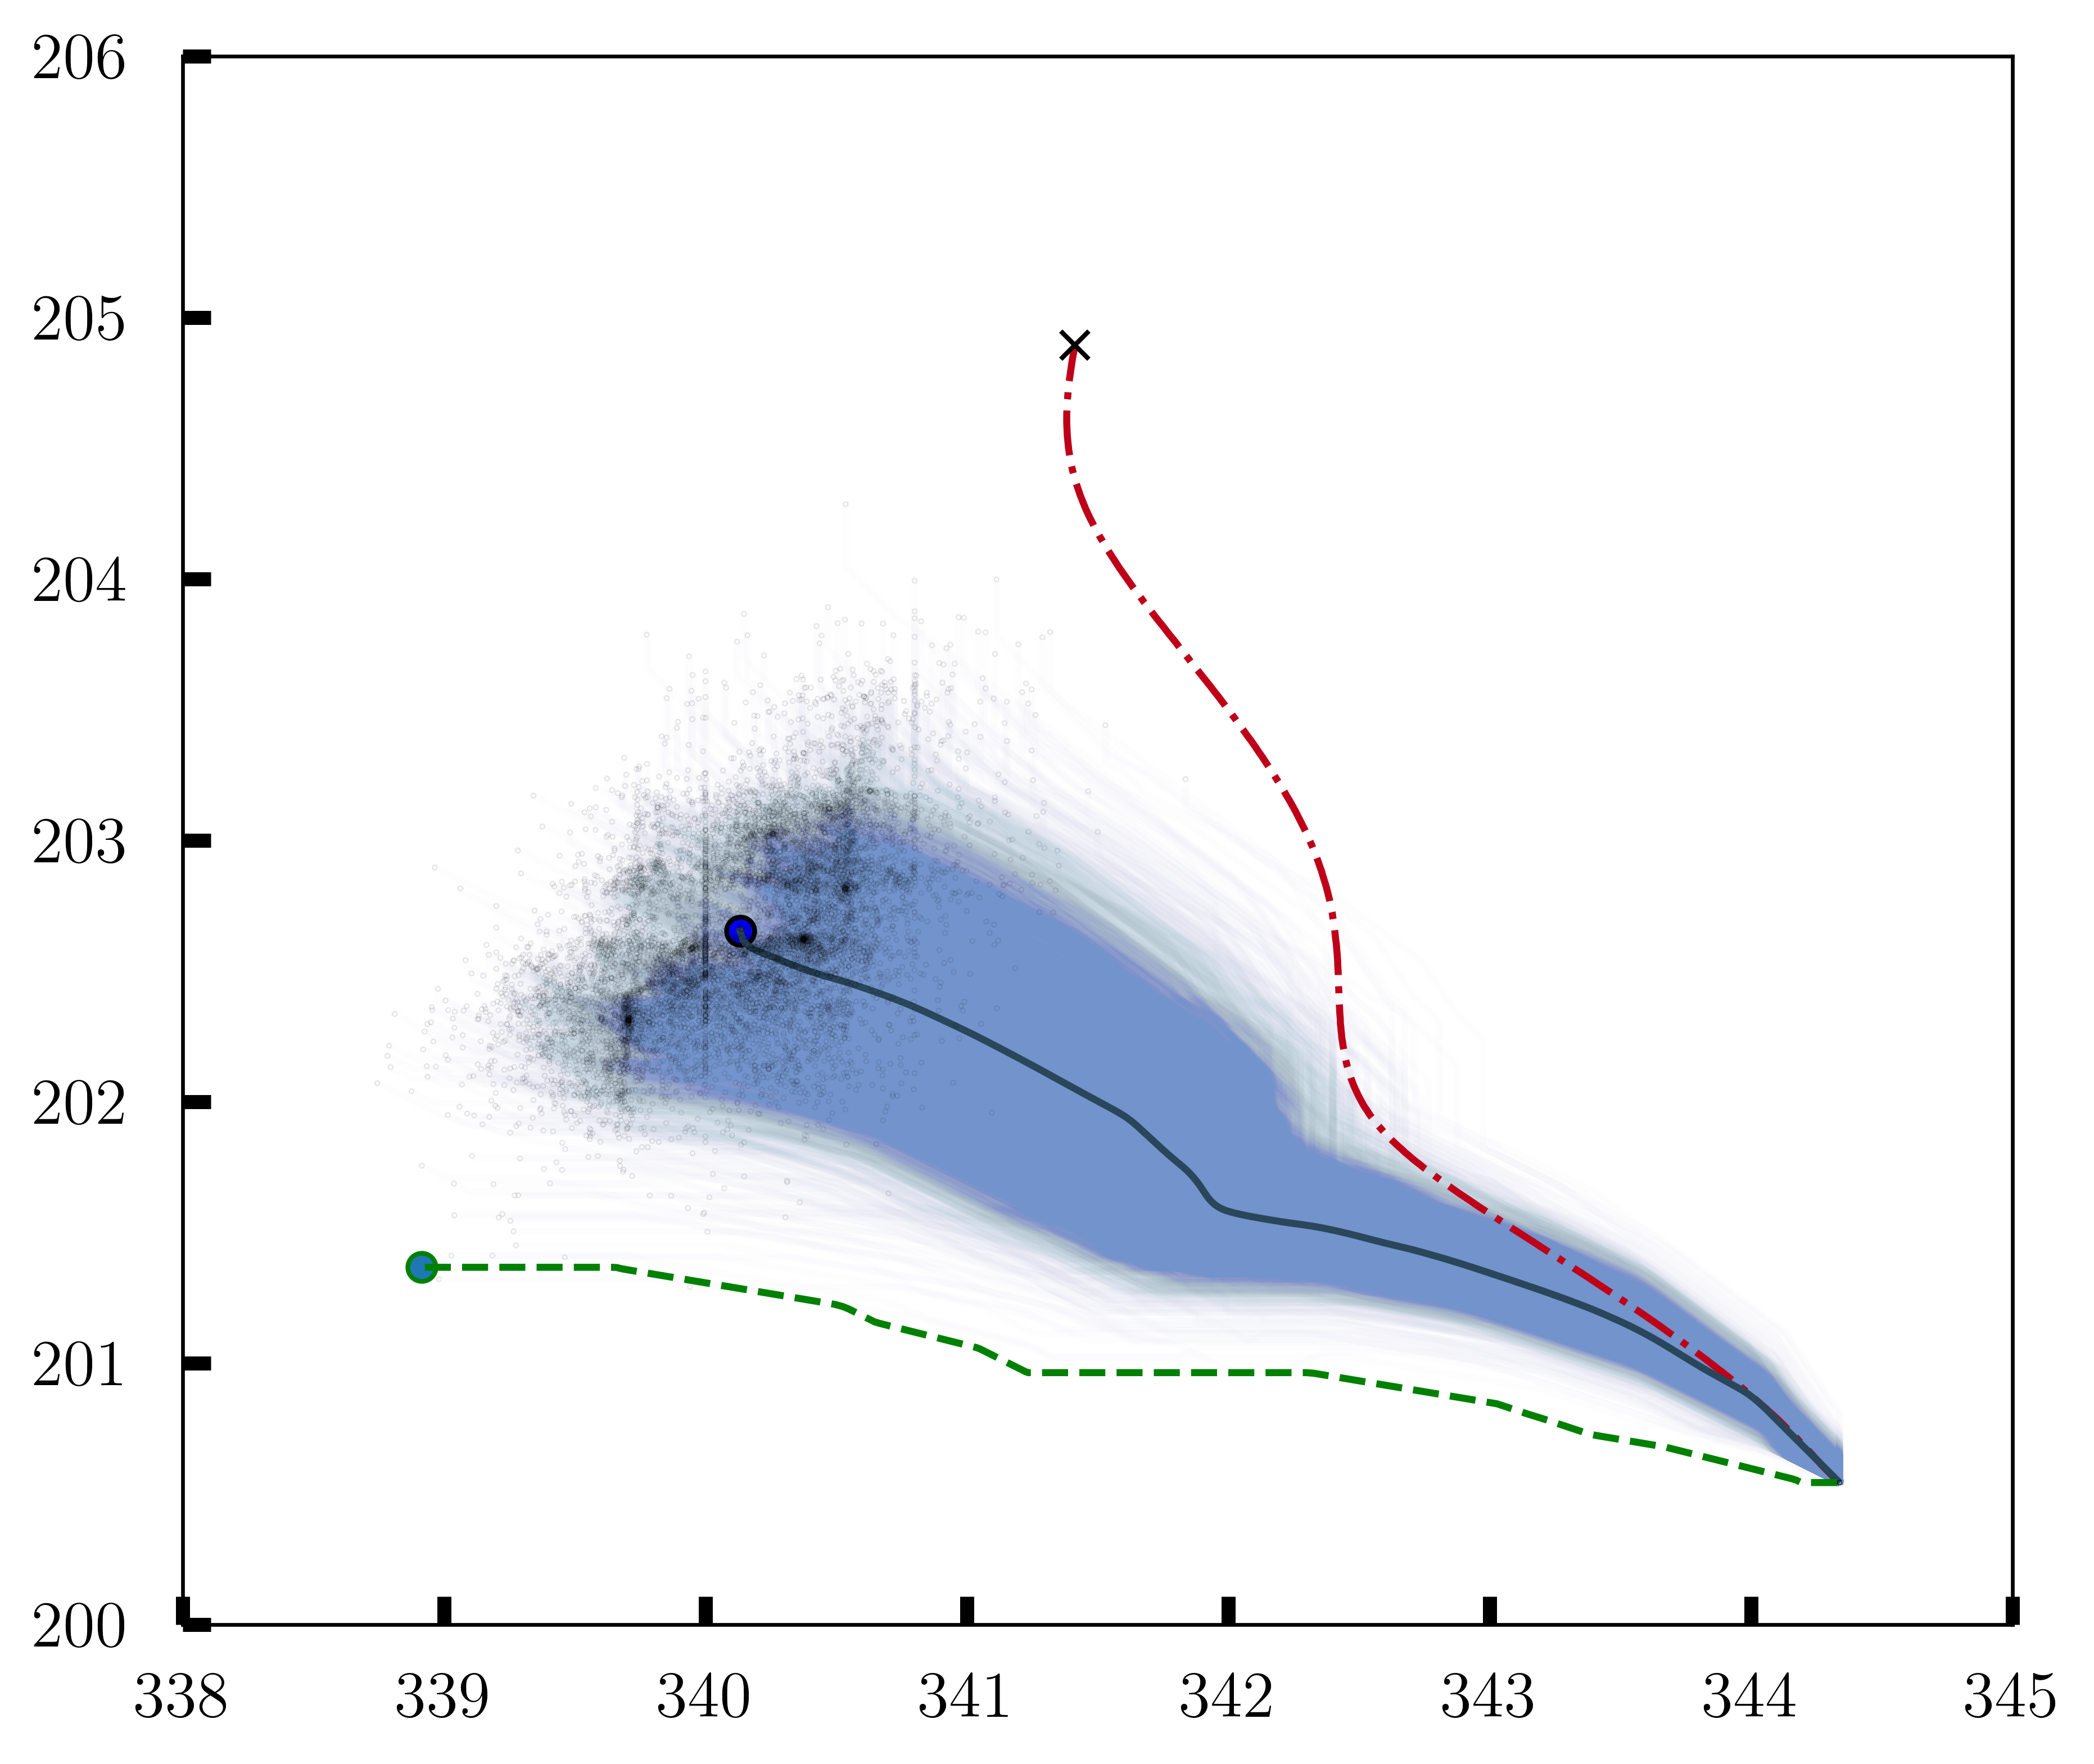

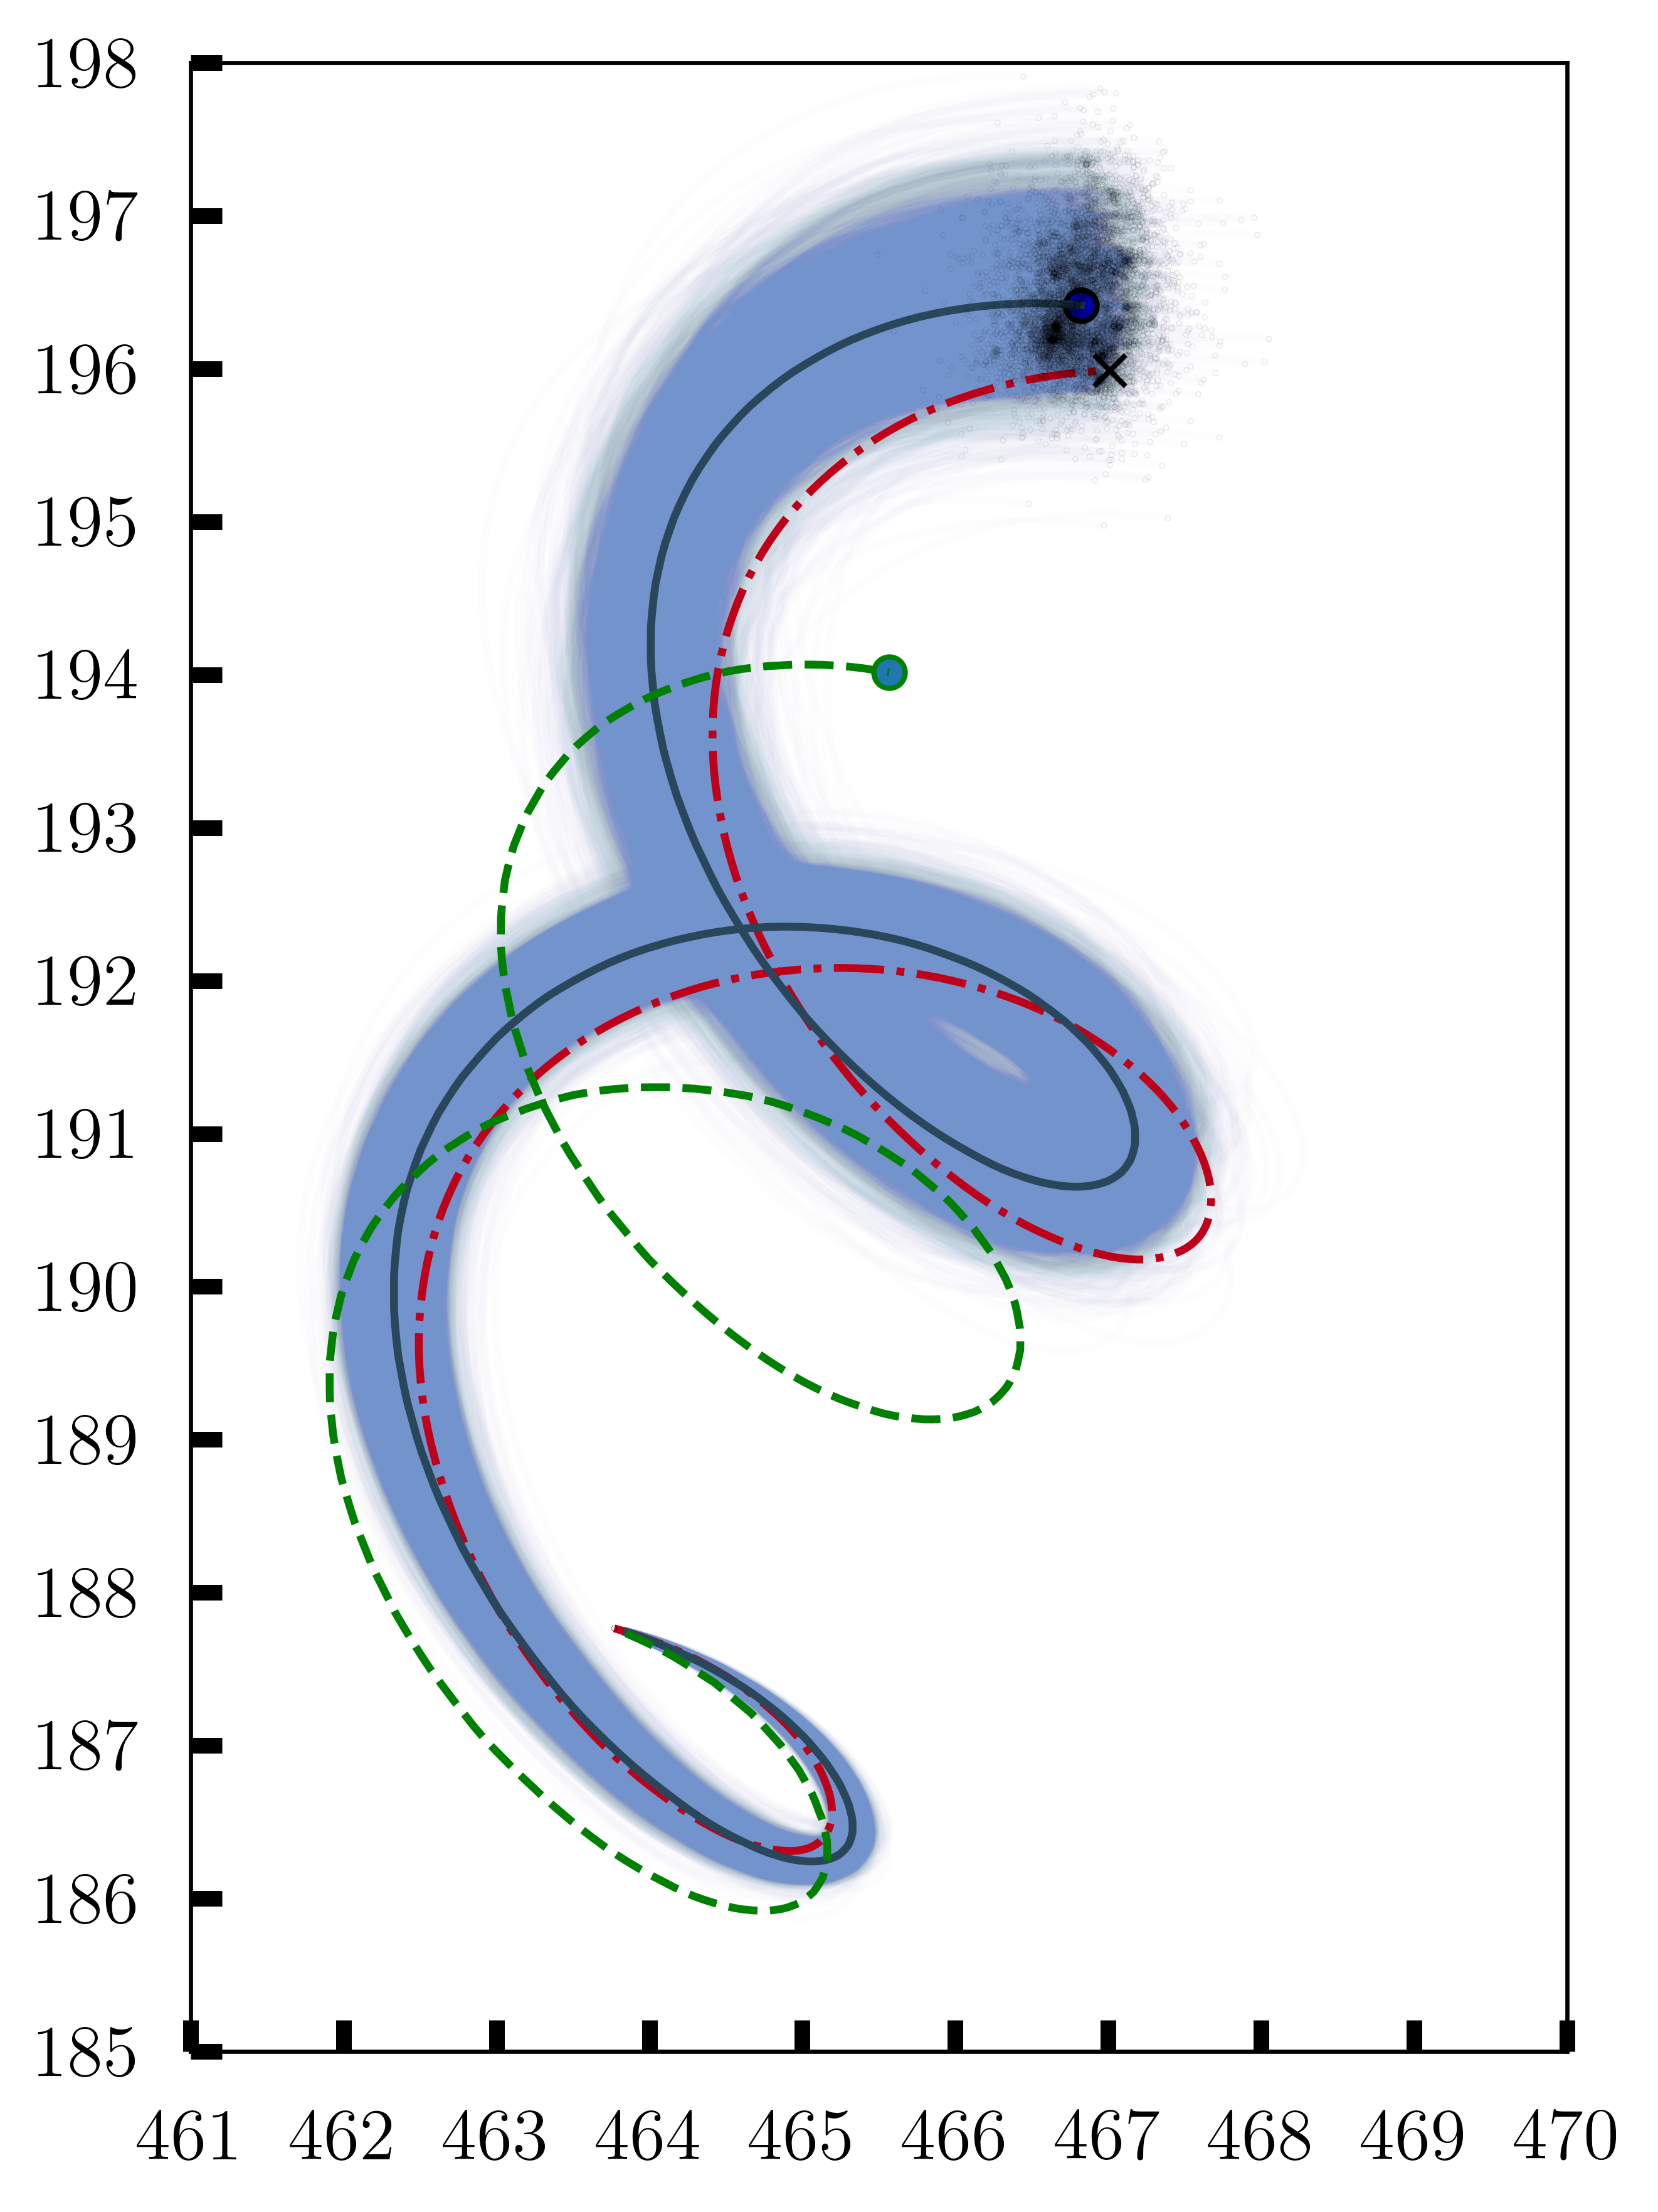

In [41]:
#importlib.reload(Observation)

#drifter_ids = [41, 84, 85, 103]
drifter_ids = [39, 84, 85, 103]

# 48 hours
#ylims = [[189, 202], [218, 228], [200, 212], [185, 203]]
#xlims = [[206, 238], [359, 376], [335, 345], [461, 474]]

# 24 hours
ylims = [[194, 200], [221, 227], [200, 206], [185, 198]]
xlims = [[206, 229], [359, 369], [338, 345], [461, 470]]

#start_time_forecast = 60*60
#end_time_forecast = 2*60*60

#start_time_forecast = 12*60*60
#end_time_forecast = 24*60*60

start_time_forecast = 48*60*60
#end_time_forecast = 96*60*60 # 48 h forecast
end_time_forecast = 72*60*60 # 24 h forecast

for drifter_id, xlim, ylim in zip(drifter_ids, xlims, ylims):
    #plt.rcParams["figure.dpi"] = 300.0
    #makeDrifterPlots(drifter_id, start_time_forecast, end_time_forecast, xlim, ylim)
    plt.rcParams["figure.dpi"] = 600.0
    makeDrifterPlots(drifter_id, start_time_forecast, end_time_forecast, xlim, ylim)

In [11]:
for i in range(10):
    print(np.random.rand()*10)

3.4567402259344657
3.1360139343338886
8.334414477151157
6.602995685967495
9.358977893612826
3.5485154715873213
5.617114629704095
4.00091367317512
4.473402918311567
7.901397054538014
